In [564]:
import pandas_profiling

import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [565]:
SEED = 7
np.random.seed(SEED)

<AxesSubplot:ylabel='Density'>

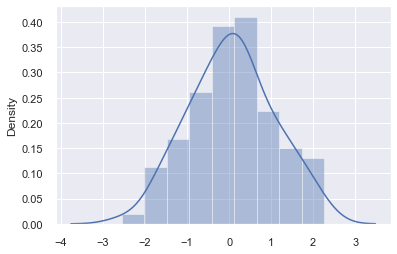

In [566]:
sns.set()
np.random.seed(0)
x = np.random.randn(100)

sns.distplot(x)

In [567]:
# 2. Data Preparing

# Loading Data
df = pd.read_csv('pima-indians-diabetes.csv')
# Getting dataframe columns names
df_name=df.columns

In [568]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gnancies   768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   diastolic  768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   dpf        768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [569]:
# Null value identification
df.isnull().sum()

gnancies     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
dpf          0
age          0
diabetes     0
dtype: int64

In [570]:
df.head()

gnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  diabetes
0         6      148         72       35        0  33.6  0.627   50         1
1         1       85         66       29        0  26.6  0.351   31         0
2         8      183         64        0        0  23.3  0.672   32         1
3         1       89         66       23       94  28.1  0.167   21         0
4         0      137         40       35      168  43.1  2.288   33         1

In [571]:
df.describe()

gnancies     glucose   diastolic     triceps     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              dpf         age    diabetes  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [572]:
# Get Shape of Given Dataset
df.shape

(768, 9)

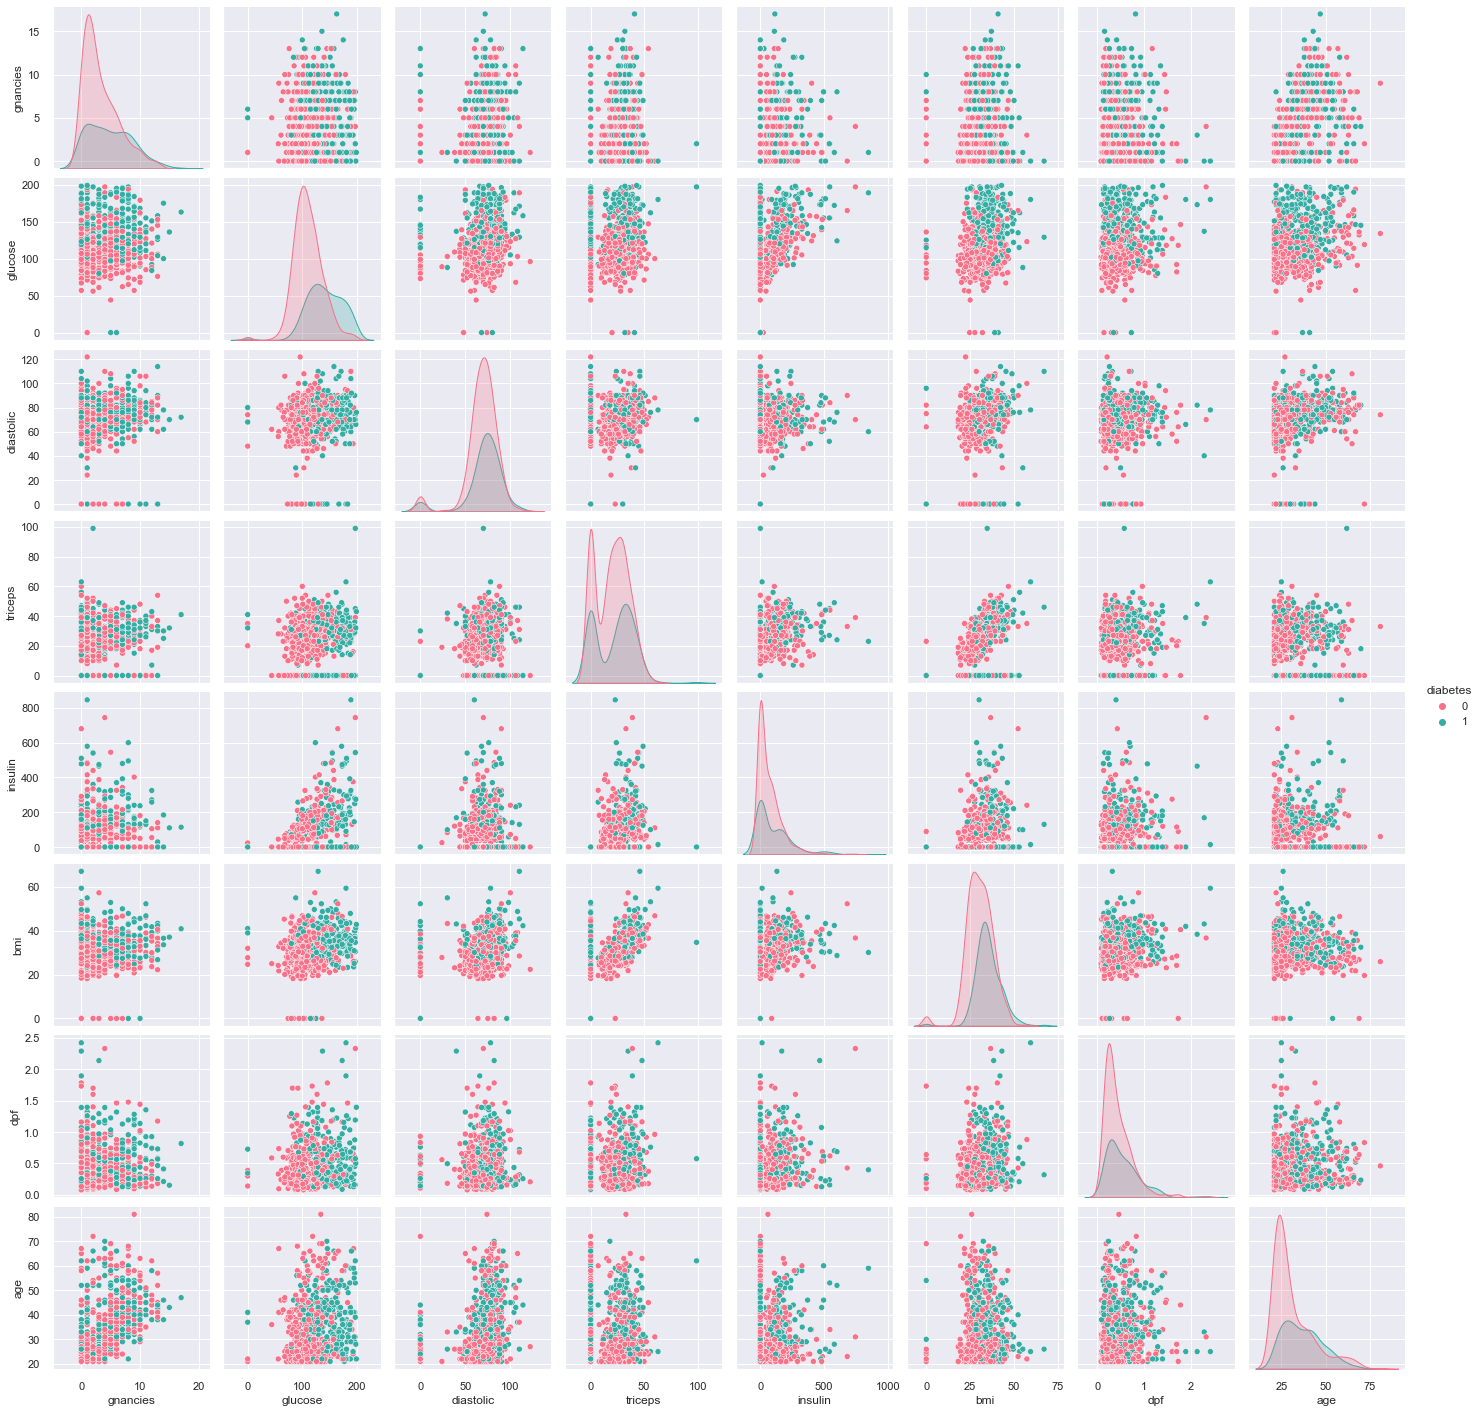

In [573]:
# DATA VISUALIZING
# let's take look at our data in the most raw shape. 

g = sns.pairplot(df, hue="diabetes", palette="husl")

In [574]:
# It seems that the data suffer from outliers

In [575]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [576]:
# OUTLIER IDENTIFICATION

# 1. Gnancies Outlier
OutLiersBox(df,df_name[0])

In [578]:
# 2. Glucose Outliers
OutLiersBox(df,df_name[1])

In [579]:
# 3. Diastolic Outlier
OutLiersBox(df,df_name[2])

In [580]:
# 4. Triceps Outlier
OutLiersBox(df,df_name[3])

In [581]:
# 5. Insulin Outlier
OutLiersBox(df,df_name[4])

In [582]:
# 6. BMI Outlier
OutLiersBox(df,df_name[5])

In [583]:
# 7. DPF Outlier
OutLiersBox(df,df_name[6])

In [584]:
# 8. Age Outlier
OutLiersBox(df,df_name[7])

In [585]:
# 9. Diabetes Outlier
OutLiersBox(df,df_name[8])

In [588]:
def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}

    
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
 
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

In [589]:
# tt = OutLierDetection(df,'gnancies','glucose',.1)

In [590]:
X =  df[df_name[0:8]]
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['diabetes'])

In [591]:
# SPOT-CHECK ALGORITHMS

def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [592]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [593]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [594]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

LR: 0.776044 (0.061919)
LDA: 0.767362 (0.069908)
KNN: 0.697913 (0.096512)
CART: 0.702995 (0.079073)
NB: 0.744586 (0.055160)
SVM: 0.749788 (0.072746)
AB: 0.753448 (0.052866)
GBM: 0.748215 (0.066452)
RF: 0.736116 (0.088344)
ET: 0.734241 (0.074254)


In [595]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [596]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

Model   Score
0    LR  0.7760
1   LDA  0.7674
2   KNN  0.6979
3  CART  0.7030
4    NB  0.7446
5   SVM  0.7498
6    AB  0.7534
7   GBM  0.7482
8    RF  0.7361
9    ET  0.7342

In [597]:
def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 


In [598]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.770871 (0.066918)
standardLDA: 0.767362 (0.069908)
standardKNN: 0.718814 (0.076470)
standardCART: 0.671779 (0.070488)
standardNB: 0.744586 (0.055160)
standardSVM: 0.755172 (0.069258)
standardAB: 0.753448 (0.052866)
standardGBM: 0.748185 (0.063765)
standardRF: 0.739595 (0.069993)
standardET: 0.732486 (0.060583)


Model   Score         Model   Score
0    LR  0.7760    standardLR  0.7709
1   LDA  0.7674   standardLDA  0.7674
2   KNN  0.6979   standardKNN  0.7188
3  CART  0.7030  standardCART  0.6718
4    NB  0.7446    standardNB  0.7446
5   SVM  0.7498   standardSVM  0.7552
6    AB  0.7534    standardAB  0.7534
7   GBM  0.7482   standardGBM  0.7482
8    RF  0.7361    standardRF  0.7396
9    ET  0.7342    standardET  0.7325

In [599]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.767332 (0.076835)
minmaxLDA: 0.767362 (0.069908)
minmaxKNN: 0.715457 (0.067083)
minmaxCART: 0.687326 (0.075933)
minmaxNB: 0.744586 (0.055160)
minmaxSVM: 0.755142 (0.054727)
minmaxAB: 0.751724 (0.056744)
minmaxGBM: 0.746461 (0.064620)
minmaxRF: 0.748064 (0.077182)
minmaxET: 0.736086 (0.062294)


Model   Score         Model   Score       Model   Score
0    LR  0.7760    standardLR  0.7709    minmaxLR  0.7673
1   LDA  0.7674   standardLDA  0.7674   minmaxLDA  0.7674
2   KNN  0.6979   standardKNN  0.7188   minmaxKNN  0.7155
3  CART  0.7030  standardCART  0.6718  minmaxCART  0.6873
4    NB  0.7446    standardNB  0.7446    minmaxNB  0.7446
5   SVM  0.7498   standardSVM  0.7552   minmaxSVM  0.7551
6    AB  0.7534    standardAB  0.7534    minmaxAB  0.7517
7   GBM  0.7482   standardGBM  0.7482   minmaxGBM  0.7465
8    RF  0.7361    standardRF  0.7396    minmaxRF  0.7481
9    ET  0.7342    standardET  0.7325    minmaxET  0.7361

In [600]:
# REMOVE OUTLIERS

df_t = df.copy()
df_t_name = df_t.columns

In [601]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

In [602]:
# 1. Remove Gnancies Outliers
feature_number = 0
df_clean = TurkyOutliers(df_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.


In [603]:
# 2. Remove Glucose Outliers
fetaure_number = 1
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 764 samples with 9 features each.


In [604]:
# 3. Remove Diastolic Outliers
feature_number = 2
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 719 samples with 9 features each.


In [605]:
# 4. Remove Triceps Outliers
feature_number = 3
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 718 samples with 9 features each.


In [606]:
# 5. Remove Triceps Outliers
feature_number = 4
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 30 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 328 480 326 330 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 688 samples with 9 features each.


In [607]:
# 6. Remove BMI Outliers
feature_number = 5
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 9 and outliers: [ 0.  53.2  0.  50.  52.9  0.  59.4 57.3  0. ]
New dataset with removed outliers has 679 samples with 9 features each.


In [608]:
# 7. Remove DPF Outliers
feature_number = 6
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 29 and outliers: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.189 1.321 1.224 1.318 1.213
 1.353 1.224 1.391 1.476 1.268 1.6   1.191 1.251 1.699 1.258 1.282 1.698
 1.461 1.292 1.394 1.174 1.182]
New dataset with removed outliers has 650 samples with 9 features each.


In [609]:
# 8. Remove AGE Outliers
feature_number = 7
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 13 and outliers: [69 65 66 65 67 81 67 66 67 66 70 68 66]
New dataset with removed outliers has 637 samples with 9 features each.


In [610]:
# 9. Remove Diabetes Outliers
feature_number = 8
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 637 samples with 9 features each.


In [611]:
# GET SHAPE AFTER REMOVE OUTLIERS
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 768, new df shape: 637, we lost 131 rows, 17.057291666666664% of our data


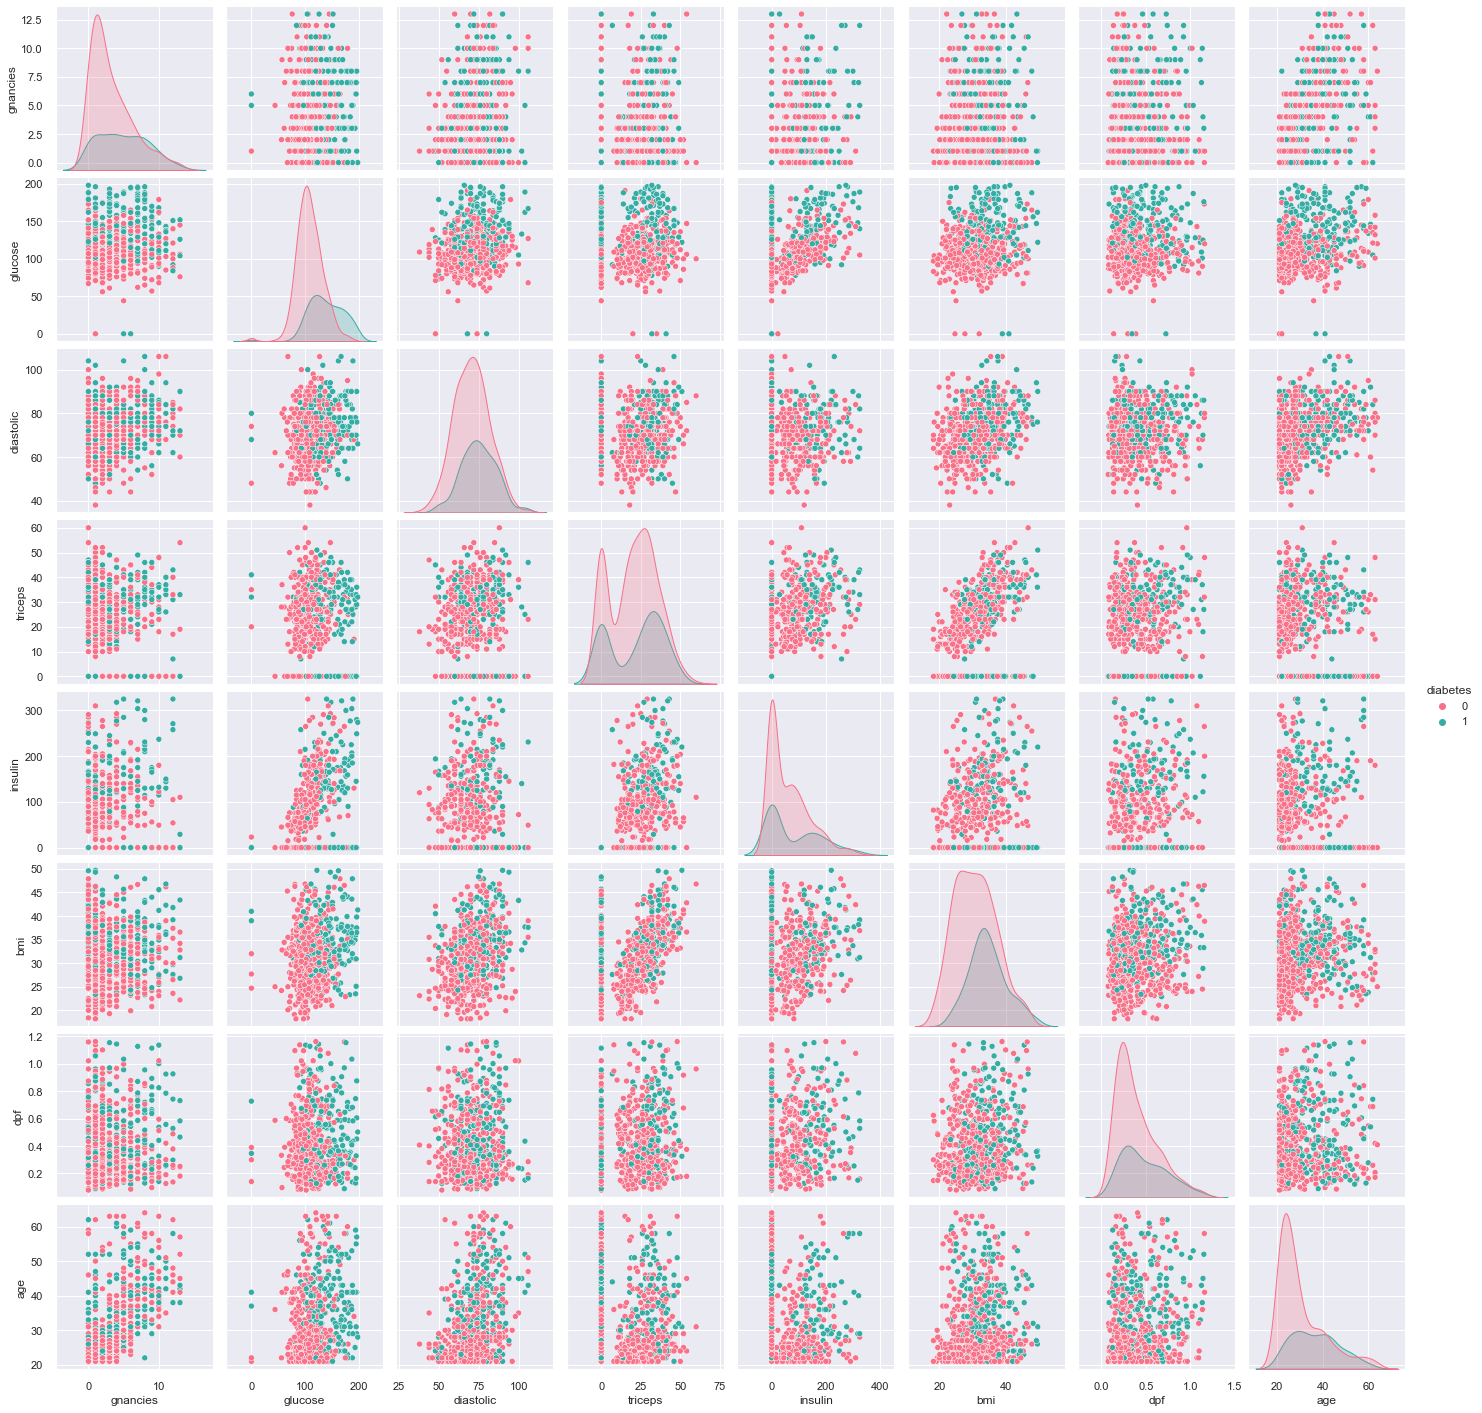

In [612]:
sns.pairplot(df_clean , hue="diabetes", palette="husl")

In [613]:
# Get Dataset shape value after removing outliers
df_clean.shape

(637, 9)

In [614]:
# DATA NORMALIZATION

df_norm = preprocessing.Normalizer().fit_transform(df_clean)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scale = scaler.fit_transform(df_clean)

df_norm = scale

c = pd.DataFrame(df_norm)
c.describe()

0           1           2           3           4           5  \
count  637.000000  637.000000  637.000000  637.000000  637.000000  637.000000   
mean     0.290786    0.594525    0.499700    0.348666    0.208448    0.439017   
std      0.250065    0.154989    0.166017    0.254020    0.252128    0.203451   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.076923    0.494949    0.382353    0.000000    0.000000    0.288889   
50%      0.230769    0.570707    0.500000    0.383333    0.123077    0.438095   
75%      0.461538    0.686869    0.617647    0.533333    0.369231    0.568254   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8  
count  637.000000  637.000000  637.000000  
mean     0.320542    0.264832    0.312402  
std      0.225578    0.248539    0.463837  
min      0.000000    0.000000    0.000000  
25%      0.148524    0.069767    0.000000  
50%      0.261070    0.186047    0.000000  
75%      0.465867    0.441860    1.000000  
max      1.000000    1.000000    1.000000

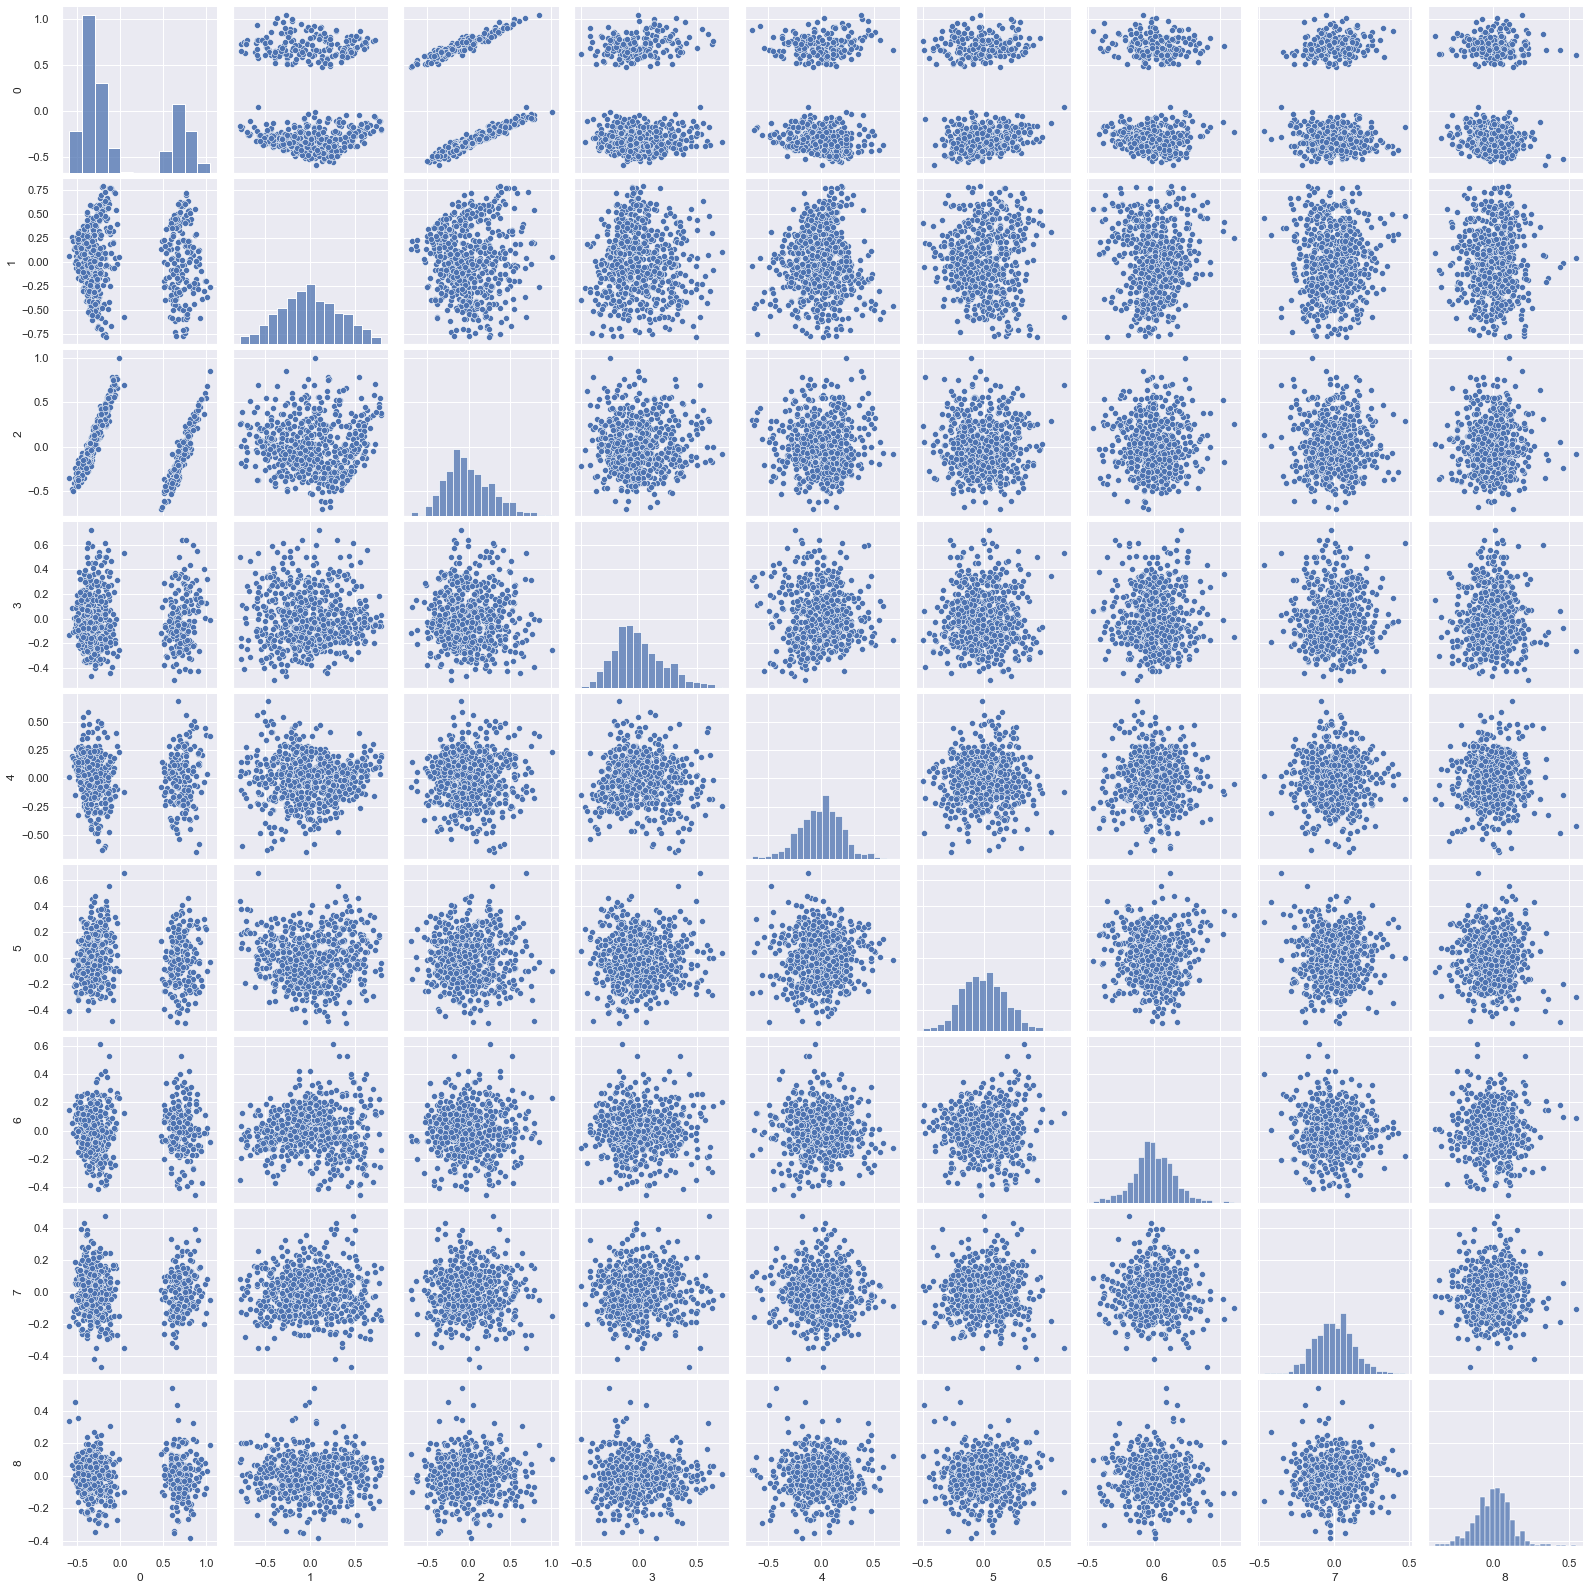

In [615]:
# CREATE PCA COMPONENT

pca = PCA(n_components = 9)
p_Components = pca.fit_transform(df_norm)

s = pd.DataFrame(p_Components)
sns.pairplot(s)

In [616]:
# SAVE PCA COMPONENT TO DATAFRAME

PCA_components = pd.DataFrame(p_Components)
PCA_components

0         1         2         3         4         5         6  \
0    0.796268  0.122047  0.125502  0.045420 -0.189480 -0.137312  0.270417   
1   -0.413191  0.000876 -0.093626 -0.052653 -0.090593 -0.123718  0.262173   
2    0.677246  0.417596 -0.297687  0.334265  0.158266 -0.163234 -0.120161   
3   -0.450300 -0.156992 -0.181309 -0.167419  0.146981 -0.051860  0.017690   
4   -0.367591  0.427383 -0.103486 -0.039061  0.110374  0.037229 -0.085833   
..        ...       ...       ...       ...       ...       ...       ...   
632 -0.011125  0.050446  1.001540 -0.250330  0.237343 -0.101246  0.234316   
633 -0.338503 -0.056627 -0.037731 -0.156204 -0.225630  0.019153 -0.017149   
634 -0.307385  0.005600  0.132506 -0.079144  0.242299 -0.049932 -0.013651   
635  0.600207  0.356419 -0.411398  0.043018  0.059218  0.132107  0.244095   
636 -0.426243 -0.102988 -0.150761 -0.146395 -0.164247 -0.110190  0.116900   

            7         8  
0   -0.073873 -0.169063  
1   -0.029997  0.002230  
2    0.133495 -0.277312  
3    0.012772  0.096362  
4    0.094603 -0.009665  
..        ...       ...  
632 -0.148411  0.104371  
633 -0.049172 -0.136514  
634  0.107462 -0.013637  
635 -0.317610  0.027159  
636  0.046644 -0.027374  

[637 rows x 9 columns]

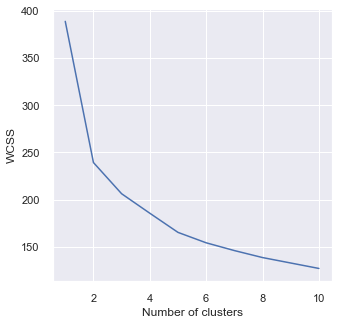

In [617]:
# CREATE TRAINING MODEL

wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(PCA_components.iloc[:,:9])
   wcss.append(model.inertia_)
plt.figure(figsize=(5,5))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

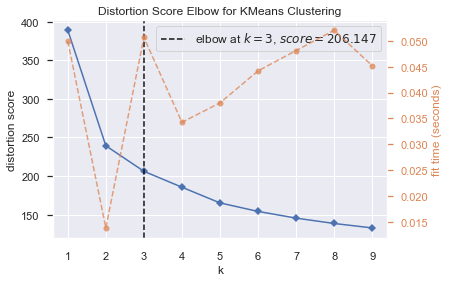

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [618]:
# 1. TRAINING WITH K_MEANS MODEL

# CHECK THE OPTIMAL K USING YELLOWBRICK

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(PCA_components)
visualizer.show()

In [619]:
# TRAINING THE K-MEAN CLUSTERING METHOD

model = KMeans(n_clusters =3 ,init = "k-means++")
label = model.fit_predict(PCA_components.iloc[:,:3])
centers = np.array(model.cluster_centers_)
uniq = np.unique(label)

In [620]:
label

array([1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0,
       1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1,
       0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0,
       2, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0,

In [621]:
frame =PCA_components
frame['cluster'] = label
frame['cluster'].value_counts()

0    312
1    199
2    126
Name: cluster, dtype: int64

In [622]:
centers

array([[-0.36839817, -0.12828809, -0.06368803],
       [ 0.71315998, -0.00724841, -0.09005887],
       [-0.21411591,  0.32911363,  0.29993953]])

In [623]:
uniq

array([0, 1, 2], dtype=int32)

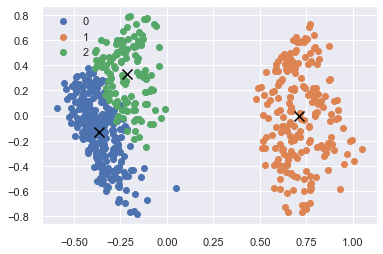

In [624]:
T=PCA_components.iloc[:,:3].values  
for i in uniq:
        
    plt.scatter(T[label == i, 0] ,T[label == i , 1] , label = i)
    
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black',s=100)
# This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [625]:
frame.shape

(637, 10)

In [626]:
frame.head(frame.shape[0])

0         1         2         3         4         5         6  \
0    0.796268  0.122047  0.125502  0.045420 -0.189480 -0.137312  0.270417   
1   -0.413191  0.000876 -0.093626 -0.052653 -0.090593 -0.123718  0.262173   
2    0.677246  0.417596 -0.297687  0.334265  0.158266 -0.163234 -0.120161   
3   -0.450300 -0.156992 -0.181309 -0.167419  0.146981 -0.051860  0.017690   
4   -0.367591  0.427383 -0.103486 -0.039061  0.110374  0.037229 -0.085833   
..        ...       ...       ...       ...       ...       ...       ...   
632 -0.011125  0.050446  1.001540 -0.250330  0.237343 -0.101246  0.234316   
633 -0.338503 -0.056627 -0.037731 -0.156204 -0.225630  0.019153 -0.017149   
634 -0.307385  0.005600  0.132506 -0.079144  0.242299 -0.049932 -0.013651   
635  0.600207  0.356419 -0.411398  0.043018  0.059218  0.132107  0.244095   
636 -0.426243 -0.102988 -0.150761 -0.146395 -0.164247 -0.110190  0.116900   

            7         8  cluster  
0   -0.073873 -0.169063        1  
1   -0.029997  0.002230        0  
2    0.133495 -0.277312        1  
3    0.012772  0.096362        0  
4    0.094603 -0.009665        2  
..        ...       ...      ...  
632 -0.148411  0.104371        2  
633 -0.049172 -0.136514        0  
634  0.107462 -0.013637        0  
635 -0.317610  0.027159        1  
636  0.046644 -0.027374        0  

[637 rows x 10 columns]

In [627]:
# STORE THE VALUE OF PCA COMPONENT IN VARIABLE

xvector =  pca.components_[0] * max(T[0])
yvector =  pca.components_[1] * max(T[1])
col = df.columns

In [628]:
col

Index(['gnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
       'age', 'diabetes'],
      dtype='object')

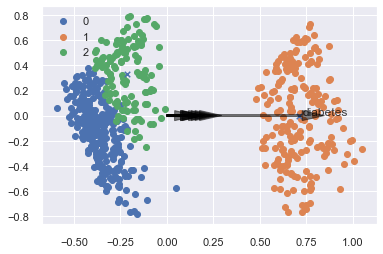

In [629]:
# plot the 'name of individual features' along with vector length
for i in range(len(col)):
    # plot arrows
   
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='black', width=0.015,
                head_width=0.08, alpha=0.5
            )
    # plot name of features
plt.text(xvector[i], yvector[i], list(col)[i], color='black', alpha=0.75)

#T=PCA_components.iloc[:,:3].values

for i in uniq:
        
    plt.scatter(T[label == i, 0] ,T[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='b',s=30)
#This is done to find the centroid for each clusters.

plt.legend()
plt.show()

In [630]:
# 2. HIERATCHICAL CLUSTERING MODEL

df_clean.shape

(637, 9)

In [631]:
d = df_clean.copy()

In [632]:
d.shape

(637, 9)

In [633]:
d

gnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0           6      148         72       35        0  33.6  0.627   50   
1           1       85         66       29        0  26.6  0.351   31   
2           8      183         64        0        0  23.3  0.672   32   
3           1       89         66       23       94  28.1  0.167   21   
4           5      116         74        0        0  25.6  0.201   30   
..        ...      ...        ...      ...      ...   ...    ...  ...   
632        10      101         76       48      180  32.9  0.171   63   
633         2      122         70       27        0  36.8  0.340   27   
634         5      121         72       23      112  26.2  0.245   30   
635         1      126         60        0        0  30.1  0.349   47   
636         1       93         70       31        0  30.4  0.315   23   

     diabetes  
0           1  
1           0  
2           1  
3           0  
4           0  
..        ...  
632         0  
633         0  
634         0  
635         1  
636         0  

[637 rows x 9 columns]

<Figure size 1440x1440 with 0 Axes>

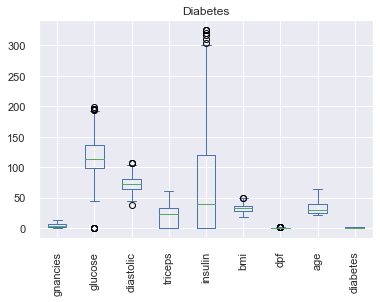

In [672]:
h = d.copy()
fig = plt.figure(figsize =(20, 20))
h.plot.box(title='Diabetes',rot=90)

plt.show()

([<matplotlib.axis.XTick at 0x7fcb01b0dd90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

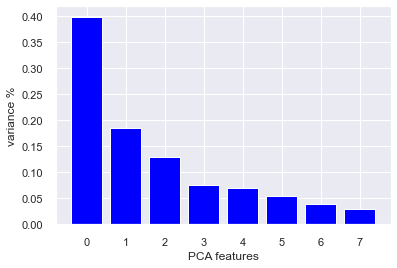

In [635]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scale=scaler.fit_transform(h)

h_norm=scale.copy()

pca = PCA(n_components=8)
h_Components = pca.fit_transform(h_norm)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [636]:
PCA_components = pd.DataFrame(h_Components)
PCA_components
#k=PCA_components
k=(PCA_components.iloc[:,:3])

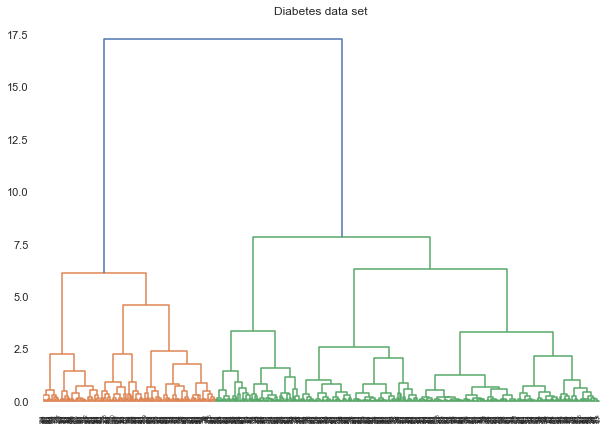

In [637]:
plt.figure(figsize=(10, 7))
plt.title("Diabetes data set")
dend = shc.dendrogram(shc.linkage(k, method='ward'))

In [638]:
# 3. AGGLOMERATIVE CLUSTERING MODEL

cluster_agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
lbl=cluster_agg.fit_predict(k)
uniqs = np.unique(lbl)

In [639]:
lbl.shape

(637,)

In [640]:
uniqs

array([0, 1, 2])

In [641]:
frame['cluster_agg'] = lbl
frame['cluster_agg'].value_counts()

0    342
1    199
2     96
Name: cluster_agg, dtype: int64

In [642]:
frame.shape

(637, 11)

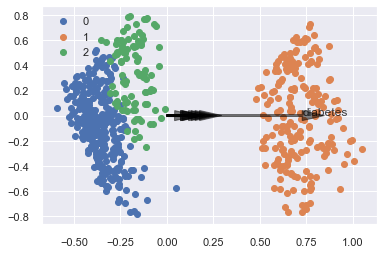

In [643]:
# plot the 'name of individual features' along with vector length
for i in range(len(col)):
    # plot arrows
   
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='black', width=0.015,
                head_width=0.08, alpha=0.5
            )
    # plot name of features
plt.text(xvector[i], yvector[i], list(col)[i], color='black', alpha=0.75)

#T=PCA_components.iloc[:,:3].values

for i in uniqs:
        
    plt.scatter(T[lbl == i, 0] ,T[lbl == i , 1] , label = i)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='b',s=30)
#This is done to find the centroid for each clusters.

plt.legend()
plt.show()

In [644]:
df_unscaled = df_clean[['gnancies','glucose','diastolic','triceps','insulin','bmi','dpf','age','diabetes']]
df_imp_scaled_name = df_unscaled.columns

In [645]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:8]
Y =  df_imp_scaled[:,8]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,8])

In [646]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [647]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [648]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [649]:
# LOGISTIC REGRESSION

# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [650]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.788838 using {'C': 0.9443559078079042, 'penalty': 'l2'}


In [651]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [652]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.796875


In [653]:
# KNN

model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [654]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))

Best: 0.760738 using {'n_neighbors': 13}
prediction on test set is: 0.8125


In [655]:
# CLASSIFICATION OF SVM
# Scikit-learn provides three classes namely SVC, NuSVC and LinearSVC which can perform multiclass-class classification.

# SVC

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [656]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.790563 using {'C': 0.3, 'kernel': 'poly'}
prediction on test set is: 0.796875


In [657]:
# ENSEMBLE METHOD

# Voting Ensemble

from sklearn.ensemble import VotingClassifier

In [658]:
param = {'C': 0.7678243129497218, 'penalty': 'none'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

model4 = RandomForestClassifier()

In [659]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),('RF',model4)]

In [660]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=3,random_state=None, shuffle=True)
# kfold = StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.7801047120418848
Accuracy on test: 0.78125


In [661]:
# BEYOND VOTING

def get_models():
    """Generate a library of base learners."""
    param = {'C': 0.7678243129497218, 'penalty': 'none'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    model4 = RandomForestClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,'RF':model4
              }

    return models

In [662]:
# ERROR CORROLATION

def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [663]:
models = get_models()
P = train_predict(models,X_train_sc,X_test_sc,y_train_sc,y_test_sc)

Fitting models.
LR... done
KNN... done
SVC... done
RF... done
Done.



In [664]:
# pip install mlens

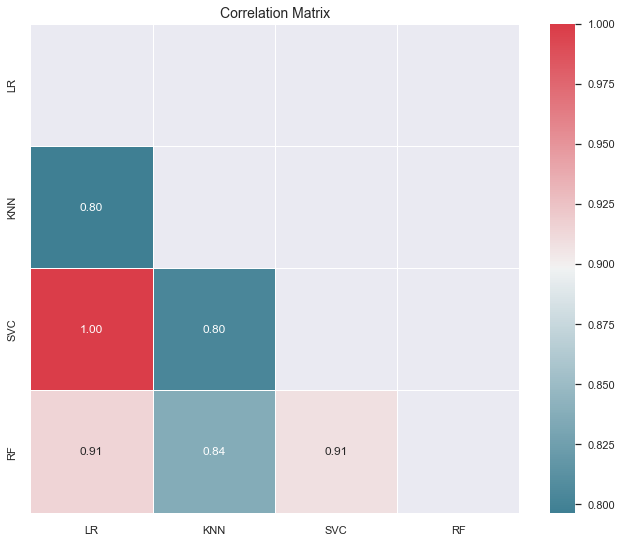

<AxesSubplot:title={'center':'Correlation Matrix'}>

In [665]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)

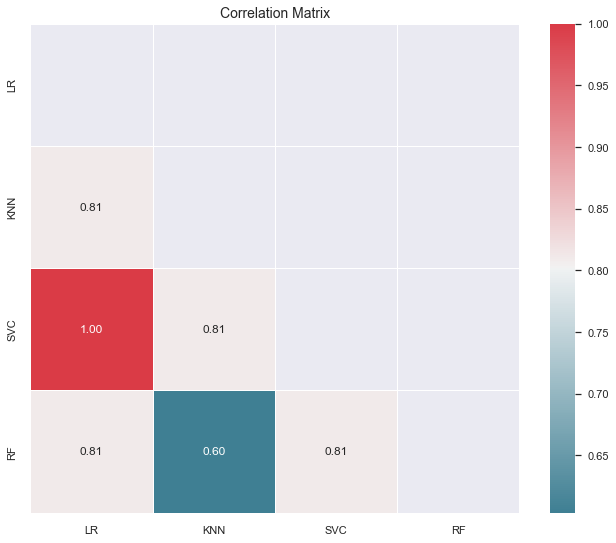

<AxesSubplot:title={'center':'Correlation Matrix'}>

In [666]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc).corr(), inflate=False)

In [667]:
# STACKING

base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

In [668]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train_sc, y_train_sc)

# Predict the test set
p_sl = sl.predict_proba(X_test_sc)

# print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test_sc, p_sl[:, 1]))


Fitting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:05

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:02


In [669]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [670]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test_sc== pp).mean())


Super Learner Accuracy score: 0.76562500


In [671]:
# CONCLUSION

# We could reach 76% accuracy